In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


/tmp/ipykernel_13538/3792736820.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
/tmp/ipykernel_13538/3792736820.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


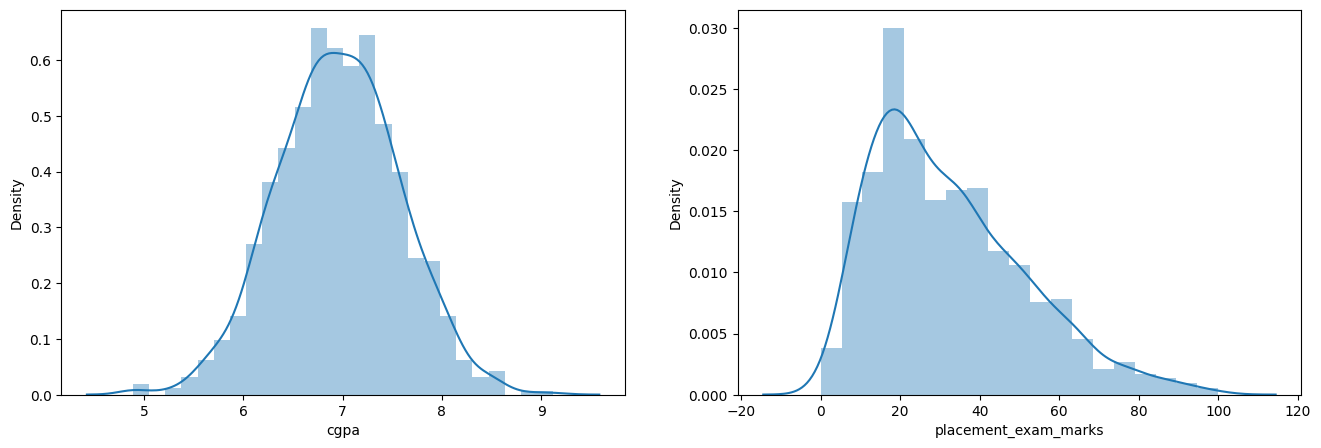

In [4]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

plt.show()

In [7]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: ylabel='placement_exam_marks'>

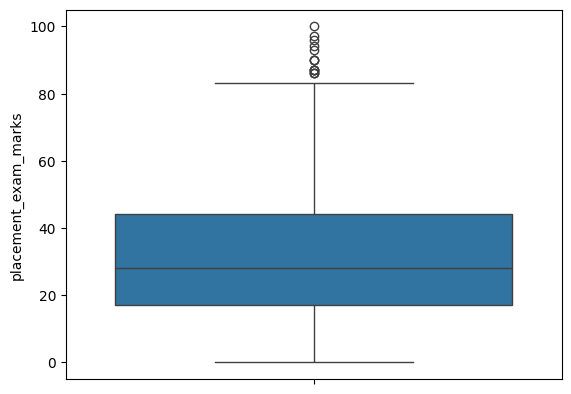

In [8]:
sns.boxplot(df['placement_exam_marks'])

In [10]:
# Finding the IQR
percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)

In [11]:
percentile75

44.0

In [12]:
iqr = percentile75 - percentile25

In [13]:
iqr

27.0

In [14]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [15]:
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 84.5
Lower limit -23.5


## Finding Outliers

In [44]:
df[df['placement_exam_marks'] > upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [16]:
df[df['placement_exam_marks'] < lower_limit]

,cgpa,placement_exam_marks,placed


## Trimming

In [17]:
new_df = df[df['placement_exam_marks'] < upper_limit]

In [18]:
new_df.shape

(985, 3)

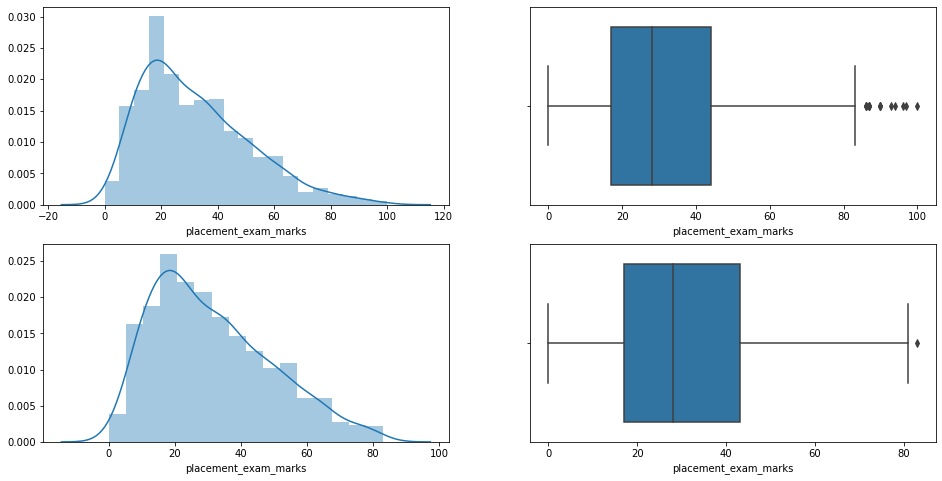

In [48]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(new_df['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df['placement_exam_marks'])

plt.show()

## Capping

In [19]:
new_df_cap = df.copy()

new_df_cap['placement_exam_marks'] = np.where(
    new_df_cap['placement_exam_marks'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['placement_exam_marks'] < lower_limit,
        lower_limit,
        new_df_cap['placement_exam_marks']
    )
)

In [20]:
np.where(condtion,true,false)

NameError: name 'condtion' is not defined

In [21]:
new_df_cap.shape

(1000, 3)

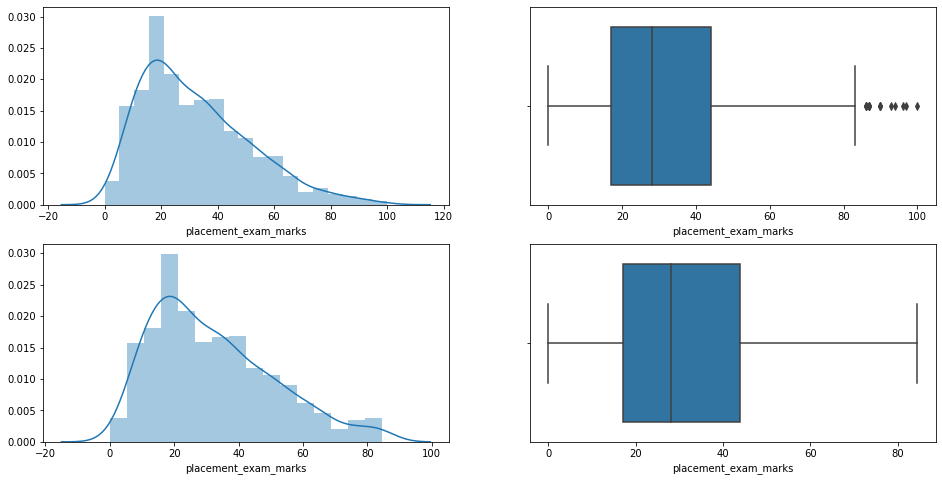

In [51]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(new_df_cap['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['placement_exam_marks'])

plt.show()

Q1: 11.0, Q3: 13.0, IQR: 2.0
লোয়ার বাউন্ড: 8.0, আপার বাউন্ড: 16.0
আউটলায়ারসমূহ: [100, 200]

ডাটাফ্রেমে আউটলায়ার মার্কিং:
    Data  Is_Outlier
0     10       False
1     12       False
2     12       False
3     13       False
4     12       False
5     11       False
6     14       False
7     13       False
8     15       False
9     10       False
10    10       False
11    10       False
12   100        True
13    12       False
14    14       False
15    13       False
16    12       False
17    10       False
18     9       False
19    15       False
20    12       False
21    13       False
22    12       False
23    11       False
24   200        True


/tmp/ipykernel_13538/1279227095.py:38: UserWarning: Glyph 2465 (\N{BENGALI LETTER DDA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_13538/1279227095.py:38: UserWarning: Matplotlib currently does not support Bengali natively.
  plt.tight_layout()
/tmp/ipykernel_13538/1279227095.py:38: UserWarning: Glyph 2494 (\N{BENGALI VOWEL SIGN AA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_13538/1279227095.py:38: UserWarning: Glyph 2463 (\N{BENGALI LETTER TTA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_13538/1279227095.py:38: UserWarning: Glyph 2478 (\N{BENGALI LETTER MA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_13538/1279227095.py:38: UserWarning: Glyph 2472 (\N{BENGALI LETTER NA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_13538/1279227095.py:38: UserWarning: Glyph 2474 (\N{BENGALI LETTER PA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykerne

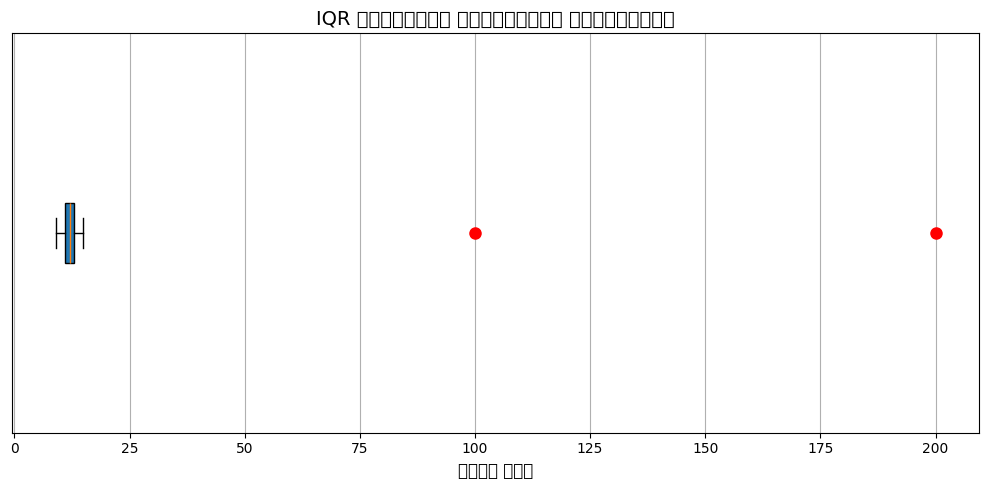

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ডাটা প্রস্তুত করুন
data = [10, 12, 12, 13, 12, 11, 14, 13, 15, 10, 10, 10, 100, 12, 14, 13, 12, 10, 9, 15, 12, 13, 12, 11, 200]

# numpy ব্যবহার করে IQR গণনা
q1, q3 = np.percentile(data, [25, 75])
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
outliers = [x for x in data if x < lower_bound or x > upper_bound]

# pandas ব্যবহার করে আউটলায়ার শনাক্তকরণ
df = pd.DataFrame({'Data': data})
df['Is_Outlier'] = (df['Data'] < lower_bound) | (df['Data'] > upper_bound)

# রেজাল্ট প্রিন্ট করুন
print(f"Q1: {q1}, Q3: {q3}, IQR: {iqr}")
print(f"লোয়ার বাউন্ড: {lower_bound}, আপার বাউন্ড: {upper_bound}")
print(f"আউটলায়ারসমূহ: {outliers}\n")
print("ডাটাফ্রেমে আউটলায়ার মার্কিং:")
print(df)

# বক্সপ্লট ভিজুয়ালাইজেশন
plt.figure(figsize=(10, 5))
plt.boxplot(data, vert=False, patch_artist=True)
plt.title("IQR পদ্ধতিতে আউটলায়ার শনাক্তকরণ", fontsize=14)
plt.xlabel("ডাটা মান", fontsize=12)
plt.yticks([])
plt.grid(True)

# আউটলায়ার গুলো লাল রঙে মার্ক করুন
for outlier in outliers:
    plt.plot(outlier, 1, 'ro', markersize=8)
    
plt.tight_layout()
plt.show()